<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

# Python for Finance (2nd ed.)

**Mastering Data-Driven Finance**

&copy; Dr. Yves J. Hilpisch | The Python Quants GmbH

<img src="http://hilpisch.com/images/py4fi_2nd_shadow.png" width="300px" align="left">

In [61]:
import math
import numpy as np
import scipy.stats as scs
import statsmodels.api as sm
# from pylab import mpl, plt
from matplotlib.pylab import mpl, plt

In [62]:
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

### Real World Data

In [63]:
import pandas as pd

In [64]:
raw = pd.read_csv('tr_eikon_eod_data.csv',
                 index_col=0, parse_dates=True).dropna()

In [65]:
data_cmc = pd.read_csv('crypto-markets.csv')

In [66]:
data_cmc['date'] = pd.to_datetime(data_cmc['date'])
data_cmc.index = pd.DatetimeIndex(data_cmc['date'])
symbol = 'bitcoin'
data_symbol = pd.DataFrame(data_cmc['close'].loc[data_cmc['slug'] == symbol])

In [67]:
symbols = ['SPY', 'GLD', 'AAPL.O', 'MSFT.O', 'bitcoin']

In [68]:
data = raw[symbols]
data["bitcoin"] = data_symbol

KeyError: "['bitcoin'] not in index"

In [69]:
data = data.dropna()

In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1304 entries, 2013-04-29 to 2018-06-29
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   SPY      1304 non-null   float64
 1   GLD      1304 non-null   float64
 2   AAPL.O   1304 non-null   float64
 3   MSFT.O   1304 non-null   float64
 4   bitcoin  1304 non-null   float64
dtypes: float64(5)
memory usage: 61.1 KB


In [72]:
data.head()

,SPY,GLD,AAPL.O,MSFT.O,bitcoin
Date,,,,,
2013-04-29,159.300,142.30,61.445653,32.61,144.54
2013-04-30,159.680,142.77,63.254222,33.10,139.00
2013-05-01,158.280,141.11,62.755652,32.72,116.99
2013-05-02,159.750,141.92,63.645651,33.16,105.21
2013-05-03,161.368,142.09,64.282793,33.49,97.75


<AxesSubplot:xlabel='Date'>

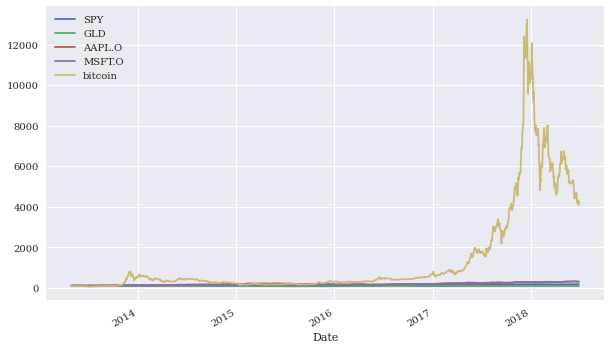

In [73]:
(data / data.iloc[0] * 100).plot(figsize=(10, 6))


In [74]:
log_returns = np.log(data / data.shift(1))
log_returns.head()

,SPY,GLD,AAPL.O,MSFT.O,bitcoin
Date,,,,,
2013-04-29,NaN,NaN,NaN,NaN,NaN
2013-04-30,0.002383,0.003297,0.029009,0.014914,-0.039082
2013-05-01,-0.008806,-0.011695,-0.007913,-0.011547,-0.172385
2013-05-02,0.009244,0.005724,0.014082,0.013358,-0.106130
2013-05-03,0.010077,0.001197,0.009961,0.009903,-0.073545


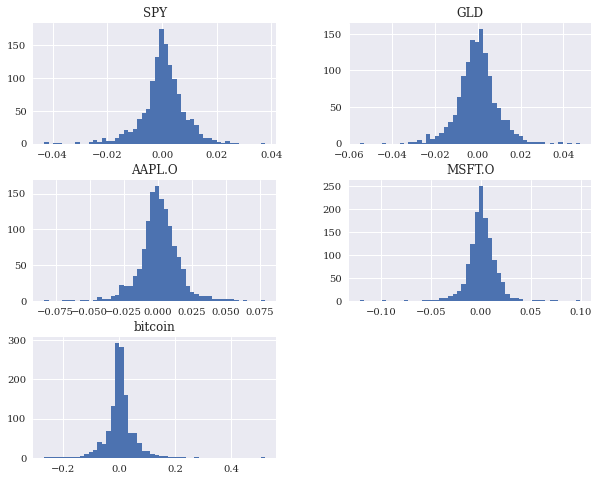

In [76]:
log_returns.hist(bins=50, figsize=(10, 8));
# plt.savefig('../../images/ch13/stat_08.png');

In [77]:
def print_statistics(array):
    ''' Prints selected statistics.
    
    Parameters
    ==========
    array: ndarray
        object to generate statistics on
    '''
    sta = scs.describe(array)
    print('%14s %15s' % ('statistic', 'value'))
    print(30 * '-')
    print('%14s %15.5f' % ('size', sta[0]))
    print('%14s %15.5f' % ('min', sta[1][0]))
    print('%14s %15.5f' % ('max', sta[1][1]))
    print('%14s %15.5f' % ('mean', sta[2]))
    print('%14s %15.5f' % ('std', np.sqrt(sta[3])))
    print('%14s %15.5f' % ('skew', sta[4]))
    print('%14s %15.5f' % ('kurtosis', sta[5]))

In [78]:
for sym in symbols:
    print('\nResults for symbol {}'.format(sym))
    print(30 * '-')
    log_data = np.array(log_returns[sym].dropna())
    print_statistics(log_data)  



Results for symbol SPY
------------------------------
     statistic           value
------------------------------
          size      1303.00000
           min        -0.04302
           max         0.03768
          mean         0.00041
           std         0.00786
          skew        -0.60106
      kurtosis         3.38698

Results for symbol GLD
------------------------------
     statistic           value
------------------------------
          size      1303.00000
           min        -0.05501
           max         0.04795
          mean        -0.00014
           std         0.00935
          skew        -0.00251
      kurtosis         2.99413

Results for symbol AAPL.O
------------------------------
     statistic           value
------------------------------
          size      1303.00000
           min        -0.08330
           max         0.07879
          mean         0.00085
           std         0.01441
          skew        -0.08623
      kurtosis         3.7

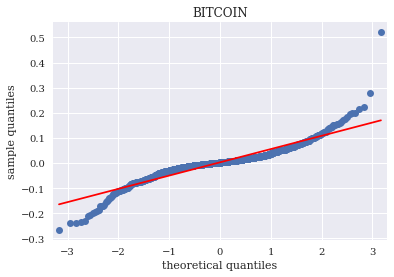

In [81]:
sm.qqplot(log_returns['bitcoin'].dropna(), line='s')
plt.title('BITCOIN')
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles');
# plt.savefig('../../images/ch13/stat_09.png');

## Portfolio Optimization

### The Data

In [82]:
symbols = ['AAPL.O', 'MSFT.O', 'SPY', 'GLD', 'bitcoin']

In [83]:
noa = len(symbols)  

In [84]:
data = data[symbols]

In [85]:
rets = np.log(data / data.shift(1))

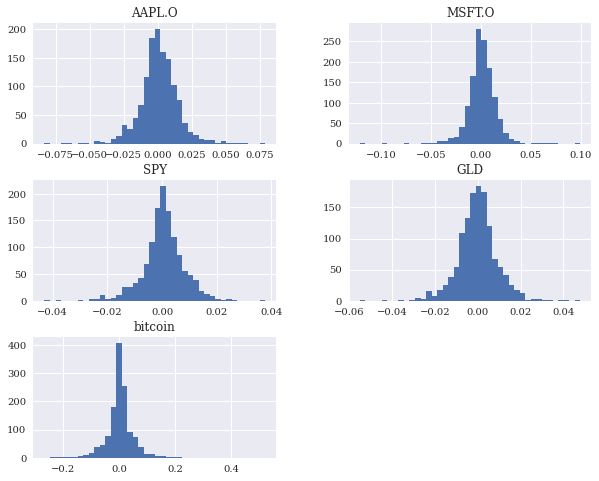

In [86]:
rets.hist(bins=40, figsize=(10, 8));


In [87]:
rets.mean() * 252  

AAPL.O     0.213281
MSFT.O     0.214007
SPY        0.102959
GLD       -0.035152
bitcoin    0.727511
dtype: float64

In [88]:
rets.cov() * 252

,AAPL.O,MSFT.O,SPY,GLD,bitcoin
AAPL.O,0.052311,0.021116,0.015316,-0.001370,0.004566
MSFT.O,0.021116,0.052531,0.018365,-0.002097,0.001944
SPY,0.015316,0.018365,0.015575,-0.002076,0.001453
GLD,-0.001370,-0.002097,-0.002076,0.022031,-0.002309
bitcoin,0.004566,0.001944,0.001453,-0.002309,0.702785


### The Basic Theory

In [89]:
weights = np.random.random(noa)  
weights /= np.sum(weights)  

In [90]:
weights

array([0.21796133, 0.12811384, 0.30518743, 0.23555827, 0.11317913])

In [91]:
weights.sum()

1.0

In [92]:
np.sum(rets.mean() * weights) * 252  

0.17938468568514276

In [93]:
np.dot(weights.T, np.dot(rets.cov() * 252, weights))  

0.01936890109157908

In [94]:
math.sqrt(np.dot(weights.T, np.dot(rets.cov() * 252, weights)))  

0.1391721994206425

In [95]:
def port_ret(weights):
    return np.sum(rets.mean() * weights) * 252

In [96]:
def port_vol(weights):
    return np.sqrt(np.dot(weights.T, np.dot(rets.cov() * 252, weights)))

In [97]:
prets = []
pvols = []
for p in range (2500):  
    weights = np.random.random(noa)  
    weights /= np.sum(weights)  
    prets.append(port_ret(weights))  
    pvols.append(port_vol(weights))  
prets = np.array(prets)
pvols = np.array(pvols)

/var/folders/bh/t4pmhqqn52n_y66q9mqwj6pw0000gn/T/ipykernel_3277/3843745508.py:6: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(label='Sharpe ratio');


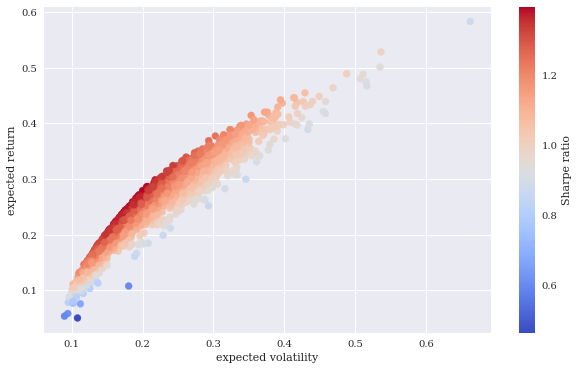

In [98]:
plt.figure(figsize=(10, 6))
plt.scatter(pvols, prets, c=prets / pvols,
            marker='o', cmap='coolwarm')
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio');
# plt.savefig('../../images/ch13/stat_12.png')

### Portfolio Optimizations

In [99]:
import scipy.optimize as sco

In [100]:
def min_func_sharpe(weights):  
    return -port_ret(weights) / port_vol(weights)  

In [101]:
cons = ({'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})  

In [102]:
bnds = tuple((0, 1) for x in range(noa))  

In [103]:
eweights = np.array(noa * [1. / noa,])  
eweights  

array([0.2, 0.2, 0.2, 0.2, 0.2])

In [104]:
min_func_sharpe(eweights)

-1.2510474443442743

In [105]:
%%time
opts = sco.minimize(min_func_sharpe, eweights,
                    method='SLSQP', bounds=bnds,
                    constraints=cons)  

CPU times: user 165 ms, sys: 12.6 ms, total: 177 ms
Wall time: 214 ms


In [106]:
opts  

     fun: -1.399822426073594
     jac: array([ 0.00018607,  0.00019889,  0.00030506,  0.11163849, -0.00123319])
 message: 'Optimization terminated successfully'
    nfev: 43
     nit: 7
    njev: 7
  status: 0
 success: True
       x: array([0.38084508, 0.38436191, 0.09247756, 0.        , 0.14231545])

In [107]:
opts['x'].round(3)  

array([0.381, 0.384, 0.092, 0.   , 0.142])

In [108]:
port_ret(opts['x']).round(3)  

0.277

In [109]:
port_vol(opts['x']).round(3)  

0.198

In [110]:
port_ret(opts['x']) / port_vol(opts['x'])  

1.399822426073594

In [112]:
optv = sco.minimize(port_vol, eweights,
                    method='SLSQP', bounds=bnds,
                    constraints=cons)  

In [113]:
optv

     fun: 0.08954342056801216
     jac: array([0.09161475, 0.10726665, 0.08955509, 0.08951482, 0.09000034])
 message: 'Optimization terminated successfully'
    nfev: 54
     nit: 9
    njev: 9
  status: 0
 success: True
       x: array([0.        , 0.        , 0.56959414, 0.41874034, 0.01166551])

In [114]:
optv['x'].round(3)

array([0.   , 0.   , 0.57 , 0.419, 0.012])

In [116]:
port_vol(optv['x']).round(3)

0.09

In [117]:
port_ret(optv['x']).round(3)

0.052

In [118]:
port_ret(optv['x']) / port_vol(optv['x'])

0.5853231905801888

### Efficient Frontier

In [119]:
cons = ({'type': 'eq', 'fun': lambda x:  port_ret(x) - tret},
        {'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})  

In [120]:
bnds = tuple((0, 1) for x in weights)

In [121]:
%%time
trets = np.linspace(0.05, 0.2, 50)
tvols = []
for tret in trets:
    res = sco.minimize(port_vol, eweights, method='SLSQP',
                       bounds=bnds, constraints=cons)  
    tvols.append(res['fun'])
tvols = np.array(tvols)

CPU times: user 6.51 s, sys: 178 ms, total: 6.69 s
Wall time: 9.11 s


/var/folders/bh/t4pmhqqn52n_y66q9mqwj6pw0000gn/T/ipykernel_3277/2759402889.py:11: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(label='Sharpe ratio')


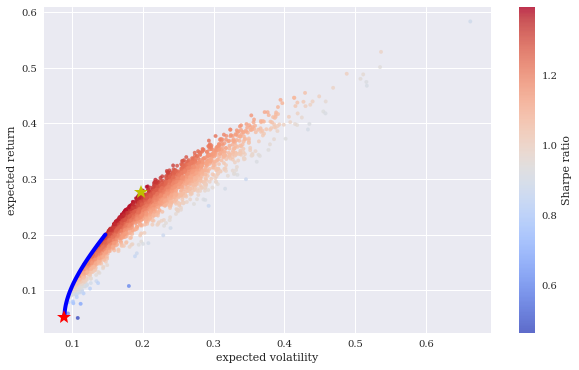

In [122]:
plt.figure(figsize=(10, 6))
plt.scatter(pvols, prets, c=prets / pvols,
            marker='.', alpha=0.8, cmap='coolwarm')
plt.plot(tvols, trets, 'b', lw=4.0)
plt.plot(port_vol(opts['x']), port_ret(opts['x']),
         'y*', markersize=15.0)
plt.plot(port_vol(optv['x']), port_ret(optv['x']),
         'r*', markersize=15.0)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')
# plt.savefig('../../images/ch13/stat_13.png')

### Capital Market Line

In [124]:
import scipy.interpolate as sci

In [125]:
ind = np.argmin(tvols)  
evols = tvols[ind:]  
erets = trets[ind:]  

In [126]:
tck = sci.splrep(evols, erets)  

In [127]:
def f(x):
    ''' Efficient frontier function (splines approximation). '''
    return sci.splev(x, tck, der=0)
def df(x):
    ''' First derivative of efficient frontier function. '''
    return sci.splev(x, tck, der=1)

In [128]:
def equations(p, rf=0.01):
    eq1 = rf - p[0]  
    eq2 = rf + p[1] * p[2] - f(p[2])  
    eq3 = p[1] - df(p[2])  
    return eq1, eq2, eq3

In [129]:
opt = sco.fsolve(equations, [0.01, 0.5, 0.15])  

In [130]:
opt  

array([0.01      , 1.32926727, 0.18161092])

In [131]:
np.round(equations(opt), 6)  

array([ 0., -0., -0.])

/var/folders/bh/t4pmhqqn52n_y66q9mqwj6pw0000gn/T/ipykernel_3277/1528333178.py:13: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(label='Sharpe ratio')


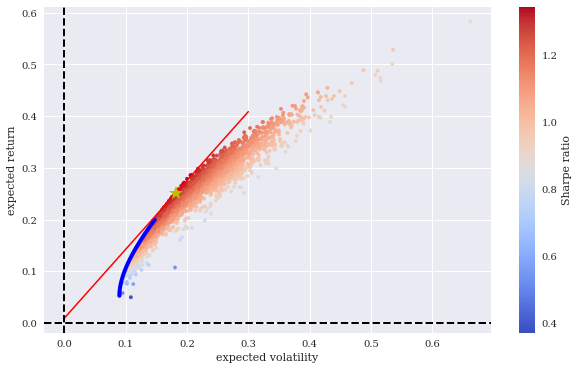

In [132]:
plt.figure(figsize=(10, 6))
plt.scatter(pvols, prets, c=(prets - 0.01) / pvols,
            marker='.', cmap='coolwarm')
plt.plot(evols, erets, 'b', lw=4.0)
cx = np.linspace(0.0, 0.3)
plt.plot(cx, opt[0] + opt[1] * cx, 'r', lw=1.5)
plt.plot(opt[2], f(opt[2]), 'y*', markersize=15.0) 
plt.grid(True)
plt.axhline(0, color='k', ls='--', lw=2.0)
plt.axvline(0, color='k', ls='--', lw=2.0)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')
# plt.savefig('../../images/ch13/stat_14.png')

In [133]:
cons = ({'type': 'eq', 'fun': lambda x:  port_ret(x) - f(opt[2])},
        {'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})  
res = sco.minimize(port_vol, eweights, method='SLSQP',
                   bounds=bnds, constraints=cons)

In [134]:
res['x'].round(3)  

array([0.33 , 0.312, 0.234, 0.   , 0.124])

In [135]:
port_ret(res['x'])

0.25140945325531555

In [136]:
port_vol(res['x'])

0.18017127665044463

In [137]:
port_ret(res['x']) / port_vol(res['x'])

1.3953914182618692

<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

<a href="http://tpq.io" target="_blank">http://tpq.io</a> | <a href="http://twitter.com/dyjh" target="_blank">@dyjh</a> | <a href="mailto:training@tpq.io">training@tpq.io</a>